In [1]:
import pandas as pd
import seaborn as sns
import quandl
quandl.ApiConfig.api_key = "RmfKxsj-RPwgAJobtSyJ"

Load amfi codes and mutual fund names

In [2]:
amfi_codes = pd.read_csv('D:\DataScience\Kaggle Problems\India_MutualFunds\AMFI-datasets-codes.csv',
                         sep = ',',
                         header = None, 
                         names = ('amfi_code','Fund_Name'))
amfi_codes.head(3)

,amfi_code,Fund_Name
0,AMFI/135762,Axis Mutual Fund - Axis Children's Gift Fund -...
1,AMFI/135765,Axis Mutual Fund - Axis Children's Gift Fund -...
2,AMFI/135759,Axis Mutual Fund - Axis Children's Gift Fund -...


In [3]:
def getQuandlData(code_index):
    code_val = amfi_codes.loc[code_index,'amfi_code']
    amfi = quandl.get(code_val)
    #amfi['Code'] = code_val.split('/')[1]
    amfi['Fund_Name'] = amfi_codes.loc[code_index,'Fund_Name']
    return amfi

In [4]:
def plot_timeseries_column(data, column_name):
    amfi.loc[:,column_name].plot()

In [5]:
amfi_dataset = pd.DataFrame()
for x in range(0,50):
    amfi = getQuandlData(x)
    amfi_dataset = amfi_dataset.append(amfi)
    
amfi_dataset.describe()

,Net Asset Value,Repurchase Price,Sale Price
count,18994.000000,18994.000000,18994.000000
mean,80.436356,79.678959,80.436356
std,141.691757,140.291726,141.691757
min,10.133200,9.829200,10.133200
25%,14.127550,14.056250,14.127550
50%,23.148700,22.917200,23.148700
75%,110.018500,108.652500,110.018500
max,821.900000,813.680000,821.900000


Check for null values

In [6]:
#amfi_dataset.reset_index(inplace = True)
#amfi_dataset.head(5)

In [7]:
print('Check for na values')
for x in range(0,4):
    print(amfi_dataset.columns[x], "--", sum(amfi_dataset.iloc[:,x].isna()))

Check for na values
Net Asset Value -- 0
Repurchase Price -- 0
Sale Price -- 0
Fund_Name -- 0


In [8]:
print('Check for null values')
for x in range(0,4):
    print(amfi_dataset.columns[x], "--", sum(amfi_dataset.iloc[:,x].isna()))

Check for null values
Net Asset Value -- 0
Repurchase Price -- 0
Sale Price -- 0
Fund_Name -- 0


In [9]:
#amfi_dataset.groupby(['Fund_Name']).count().plot()

Text(0.5,1,'Number of Funds to count')

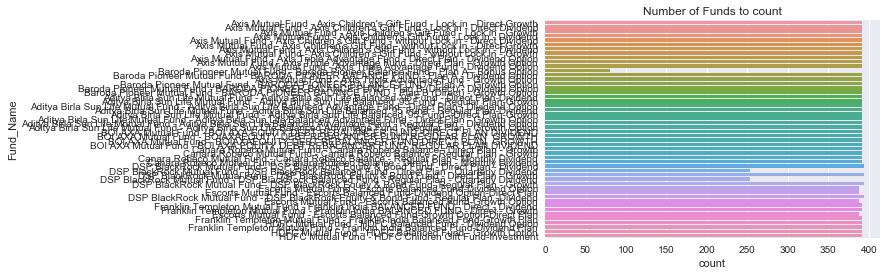

In [10]:
sns.set(style="darkgrid")
ax = sns.countplot(y="Fund_Name", data=amfi_dataset, linewidth = 0.1)
ax.set_title("Number of Funds to count")

In [11]:
amfi_dataset.head()

,Net Asset Value,Repurchase Price,Sale Price,Fund_Name
Date,,,,
2016-08-30,11.0348,11.0348,11.0348,Axis Mutual Fund - Axis Children's Gift Fund -...
2016-08-31,11.0752,11.0752,11.0752,Axis Mutual Fund - Axis Children's Gift Fund -...
2016-09-01,11.0562,11.0562,11.0562,Axis Mutual Fund - Axis Children's Gift Fund -...
2016-09-02,11.0805,11.0805,11.0805,Axis Mutual Fund - Axis Children's Gift Fund -...
2016-09-06,11.1672,11.1672,11.1672,Axis Mutual Fund - Axis Children's Gift Fund -...


In [17]:
amfi_dataset.corr()

,Net Asset Value,Repurchase Price,Sale Price
Net Asset Value,1.000000,0.999995,1.000000
Repurchase Price,0.999995,1.000000,0.999995
Sale Price,1.000000,0.999995,1.000000


Net Assest Value and Sale Price do not show much variation.

In [ ]:
Variation is being by Repurchase value that at a very low value i.e. 0.999995

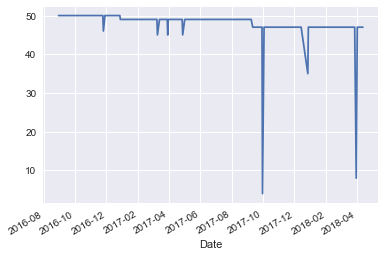

In [12]:
amfi_dataset.groupby(amfi_dataset.index)['Fund_Name'].count().plot()

In [13]:
#amfi_dataset = amfi_dataset.sort_index(ascending = False)
#amfi_dataset.groupby(amfi_dataset.index)['Fund_Name'].count().plot()

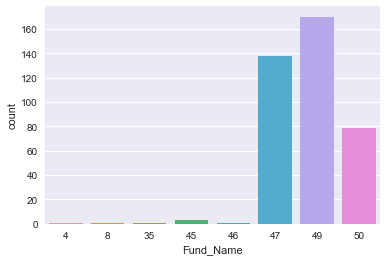

In [14]:
sns.countplot(amfi_dataset.groupby(amfi_dataset.index)['Fund_Name'].count())

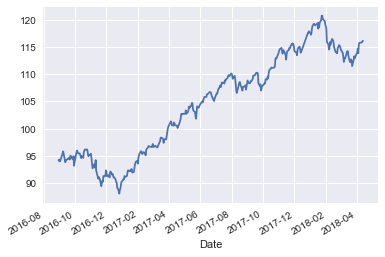

In [15]:
column_name = 'Sale Price'
plot_timeseries_column(amfi,column_name)

In [16]:
amfi_dataset.head()

,Net Asset Value,Repurchase Price,Sale Price,Fund_Name
Date,,,,
2016-08-30,11.0348,11.0348,11.0348,Axis Mutual Fund - Axis Children's Gift Fund -...
2016-08-31,11.0752,11.0752,11.0752,Axis Mutual Fund - Axis Children's Gift Fund -...
2016-09-01,11.0562,11.0562,11.0562,Axis Mutual Fund - Axis Children's Gift Fund -...
2016-09-02,11.0805,11.0805,11.0805,Axis Mutual Fund - Axis Children's Gift Fund -...
2016-09-06,11.1672,11.1672,11.1672,Axis Mutual Fund - Axis Children's Gift Fund -...
